In [1]:
%matplotlib notebook
%pylab
from scipy.interpolate import griddata
from matplotlib import cm

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from module_poisson_new_2D import*

In [3]:
# Domain of integration, look into func_2D module to add your own problem or initial condition

def domain(icase):
    
    
    if(icase == 1):
        ax = 0 ; bx = 1 
        ay = 0 ; by = 1 
    elif(icase == 2):
        ax = 0 ; bx = 1 
        ay = 0 ; by = 1 
    elif(icase == 3):
        ax = -1 ; bx = 1
        ay = -1 ; by = 1
    elif(icase == 4):
        ax = -1 ; bx = 1
        ay = -1 ; by = 1
    elif(icase == 5):
        ax = -1 ; bx = 1
        ay = -1 ; by = 1
        
    print("==========================================")
    print("Problem: Poisson")
    print("Domain: [{}, {}]".format(ax,bx)) 
    return ax, bx,ay, by


# Boundary conditions 
    
def bc_type(x_boundary,y_boundary):
    
    bound = array([x_boundary,y_boundary])
    
    sbound = ["Dirichlet", "Neumann"]
    nbound = [5,4]
    
    st = ""
    
    for i in range(2):
        
        if(nbound[i] in bound):
            st += sbound[i] + " & "
            
    print("Boundary conditions: ",st)
    
    print("==========================================\n") 

In [4]:
order = array([1,2,3,4])        # polynomial order
N_element = array([8,16,24,32])

integration_type = 1      # % = 1 is inexact and = 2 is exact
iplot = False             # plot the solution
icase = 5                 # select icase: 1,2,3

# Boundary type: 4 = Neumann, 5 = Dirichlet     
x_boundary = [4,4]    # Bottom and Top (x = -1 and x = +1)
y_boundary = [4,4]    # Left and Right (y = -1 and x = +1)

# Domain and diffusion coefficient

ax,bx,ay, by = domain(icase)
bc_type(x_boundary,y_boundary)

len_el = len(N_element)
len_pol = len(order)
l2e_norm = zeros((len_pol, len_el))
max_norm = zeros((len_pol, len_el))

Nv = N_element
    
for iN,N in enumerate(order):
    
    N = order[iN]
    if (integration_type == 1):
        Q = N
    elif (integration_type == 2):
        Q = N+1

    for e, nel in enumerate(Nv):
            
        Nelx = nel; Nely = nel
        Nx = Nelx*N+1
        Ny = Nely*N+1
        Np = Nx*Ny
        Ne = Nelx*Nely
        Nbound = 2*Nx + 2*(Ny-2)
        Nside = 2*Ne + Nelx + Nely
        
        tic = perf_counter()
        
    
        qe, q,coord,intma = poisson_solver(N,Q,Ne, Np, ax, bx,ay,by, Nelx, Nely, Nx, Ny, \
                                    Nbound,Nside,icase,x_boundary,y_boundary)
        
        
        top = sum((q - qe)**2)
        bot = sum(qe**2)

        e2 = sqrt(top/bot)
        
        print("\tl2_norm = {:.4e}".format(e2))
        
        l2e_norm[iN,e] = e2
        
        
        

Problem: Poisson
Domain: [-1, 1]
Boundary conditions:  Neumann & 

N = 1, nel = 64, Np = 81
	l2_norm = 1.0816e-01
N = 1, nel = 256, Np = 289
	l2_norm = 2.7604e-02
N = 1, nel = 576, Np = 625
	l2_norm = 1.2407e-02
N = 1, nel = 1024, Np = 1089
	l2_norm = 7.0239e-03
N = 2, nel = 64, Np = 289
	l2_norm = 2.1037e-03
N = 2, nel = 256, Np = 1089
	l2_norm = 1.3544e-04
N = 2, nel = 576, Np = 2401
	l2_norm = 2.7005e-05
N = 2, nel = 1024, Np = 4225
	l2_norm = 8.5843e-06
N = 3, nel = 64, Np = 625
	l2_norm = 1.6332e-05
N = 3, nel = 256, Np = 2401
	l2_norm = 5.2408e-07
N = 3, nel = 576, Np = 5329
	l2_norm = 6.9551e-08
N = 3, nel = 1024, Np = 9409
	l2_norm = 1.6566e-08
N = 4, nel = 64, Np = 1089
	l2_norm = 3.3734e-07
N = 4, nel = 256, Np = 4225
	l2_norm = 5.4032e-09
N = 4, nel = 576, Np = 9409
	l2_norm = 4.7768e-10
N = 4, nel = 1024, Np = 16641
	l2_norm = 8.5297e-11


In [5]:
xmin = min(coord[:,0])
xmax = max(coord[:,0])
ymin = min(coord[:,1])
ymax = max(coord[:,1])
xe = coord[:,0]
ye = coord[:,1]
nx = 200
ny = 200
dx = (xmax-xmin)/nx
dy = (ymax-ymin)/ny
x1 = arange(xmin,xmax+dx,dx)
y1 = arange(ymin,ymax+dy,dy)
xi,yi = meshgrid(x1,y1)

<IPython.core.display.Javascript object>


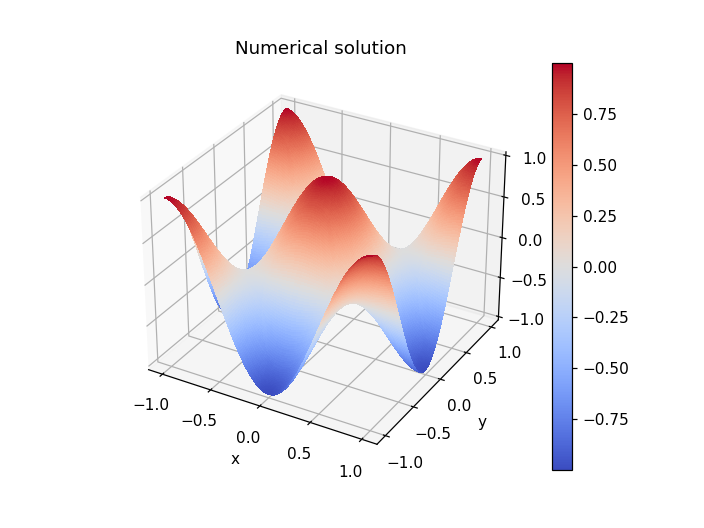

In [6]:
q_2d = griddata((xe,ye),q,(xi,yi), method='cubic')

fig = figure(1)
fx = fig.add_subplot(111, projection='3d')
surf = fx.plot_surface(xi,yi,q_2d,rstride = 1, cstride = 1,cmap=cm.coolwarm,antialiased=False)
fig.colorbar(surf)

title("Numerical solution")
xlabel("x")
ylabel("y")

show()

<IPython.core.display.Javascript object>


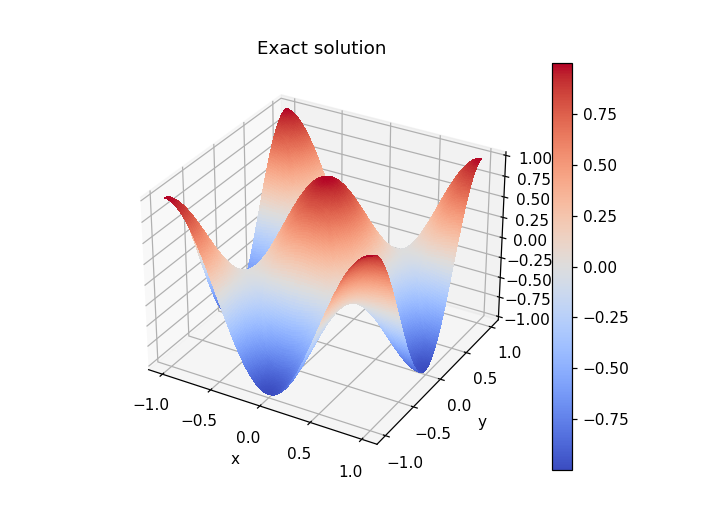

In [7]:
qe_2d = griddata((xe,ye),qe,(xi,yi), method='cubic')

fig = figure(2)
fx = fig.add_subplot(111, projection='3d')
surf = fx.plot_surface(xi,yi,qe_2d,rstride = 1, cstride = 1,cmap=cm.coolwarm,antialiased=False)
fig.colorbar(surf)
title("Exact solution")
xlabel("x")
ylabel("y")
show()

<IPython.core.display.Javascript object>


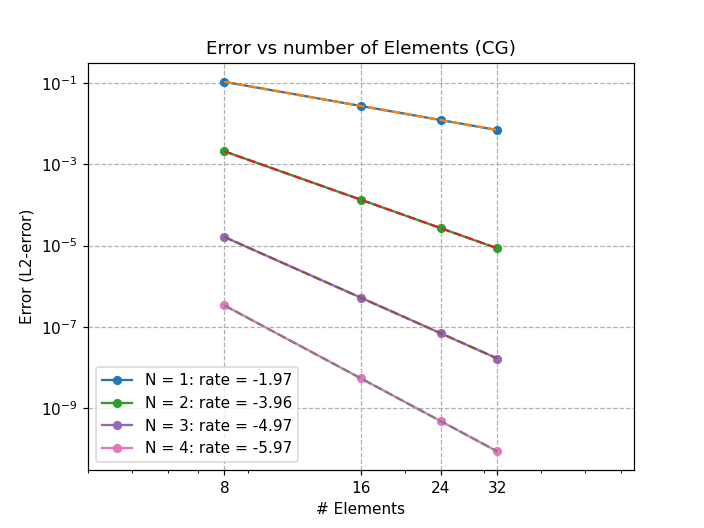

In [8]:
import cg_graphics           # import cg_graphics module

figure(3)
clf()

for i,N in enumerate(order):

    if(N >= 2):
        p = polyfit(log(Nv[:3]), log(l2e_norm[i][:3]), 1)
    else:

        p = polyfit(log(Nv), log(l2e_norm[i]), 1)

    loglog(Nv, l2e_norm[i], '-o',markersize=5, label = 'N = {:d}: rate = {:.2f}'.format(N,p[0]))

    loglog(Nv, exp(polyval(p,log(Nv))), '--')

cg_graphics.set_xticks(Nv)
xlabel('# Elements')
ylabel('Error (L2-error)')
title('Error vs number of Elements ({:s})'.format('cg'.upper()))
grid(axis='both',linestyle='--')
legend()
show()